In [ ]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import os
import random
import cv2
import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
#from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import load_model



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp '/content/drive/MyDrive/digits.zip' '/content'

In [ ]:
!mkdir digits

mkdir: cannot create directory ‘digits’: File exists


In [ ]:
!unzip /content/digits.zip -d "/content/digits"

Streaming output truncated to the last 5000 lines.
  inflating: /content/digits/dataset/Validation/F/167.jpg  
  inflating: /content/digits/dataset/Validation/F/168.jpg  
  inflating: /content/digits/dataset/Validation/F/169.jpg  
  inflating: /content/digits/dataset/Validation/F/17.jpg  
  inflating: /content/digits/dataset/Validation/F/170.jpg  
  inflating: /content/digits/dataset/Validation/F/171.jpg  
  inflating: /content/digits/dataset/Validation/F/172.jpg  
  inflating: /content/digits/dataset/Validation/F/173.jpg  
  inflating: /content/digits/dataset/Validation/F/174.jpg  
  inflating: /content/digits/dataset/Validation/F/175.jpg  
  inflating: /content/digits/dataset/Validation/F/176.jpg  
  inflating: /content/digits/dataset/Validation/F/177.jpg  
  inflating: /content/digits/dataset/Validation/F/178.jpg  
  inflating: /content/digits/dataset/Validation/F/179.jpg  
  inflating: /content/digits/dataset/Validation/F/18.jpg  
  inflating: /content/digits/dataset/Validation/F/1

In [ ]:
dir = "../content/digits/Train/"
train_data = []
img_size = 32
non_chars = ["#","$","&","@"]
for i in os.listdir(dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 4000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        train_data.append([img,i])

In [ ]:
len(train_data)

140000

In [ ]:
val_dir = "../content/digits/Validation/"
val_data = []
img_size = 32
for i in os.listdir(val_dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(val_dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 1000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        val_data.append([img,i])

In [ ]:
len(val_data)

15209

In [ ]:
random.shuffle(train_data)
random.shuffle(val_data)

In [ ]:
train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)

In [ ]:
val_X = []
val_Y = []
for features,label in val_data:
    val_X.append(features)
    val_Y.append(label)

In [ ]:
LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
val_Y = LB.fit_transform(val_Y)

In [ ]:
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1,32,32,1)
train_Y = np.array(train_Y)

In [ ]:
val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1,32,32,1)
val_Y = np.array(val_Y)

In [ ]:
print(train_X.shape,val_X.shape)

(140000, 32, 32, 1) (15209, 32, 32, 1)


In [ ]:
print(train_Y.shape,val_Y.shape)

(140000, 35) (15209, 35)


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(35, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

In [ ]:
history = model.fit(train_X,train_Y, epochs=50, batch_size=32, validation_data = (val_X, val_Y),  verbose=1)

Epoch 1/50
4375/4375 [==============================] - 22s 5ms/step - loss: 0.1583 - accuracy: 0.9407 - val_loss: 0.2836 - val_accuracy: 0.9131
Epoch 2/50
4375/4375 [==============================] - 23s 5ms/step - loss: 0.1564 - accuracy: 0.9418 - val_loss: 0.2823 - val_accuracy: 0.9197
Epoch 3/50
4375/4375 [==============================] - 24s 5ms/step - loss: 0.1578 - accuracy: 0.9408 - val_loss: 0.2726 - val_accuracy: 0.9209
Epoch 4/50
4375/4375 [==============================] - 23s 5ms/step - loss: 0.1542 - accuracy: 0.9416 - val_loss: 0.2849 - val_accuracy: 0.9181
Epoch 5/50
4375/4375 [==============================] - 23s 5ms/step - loss: 0.1579 - accuracy: 0.9407 - val_loss: 0.2823 - val_accuracy: 0.9194
Epoch 6/50
4375/4375 [==============================] - 24s 6ms/step - loss: 0.1549 - accuracy: 0.9414 - val_loss: 0.2949 - val_accuracy: 0.9168
Epoch 7/50
4375/4375 [==============================] - 21s 5ms/step - loss: 0.1561 - accuracy: 0.9408 - val_loss: 0.2699 - val_ac

In [ ]:
model_name = 'digits_recognitionn1.h5'
model.save(model_name, save_format='h5')


In [ ]:
!cp '/content/drive/MyDrive/digits_recognition_cnn.h5' '/content'

In [ ]:
model= load_model("/content/digits_recognition_cnn.h5")

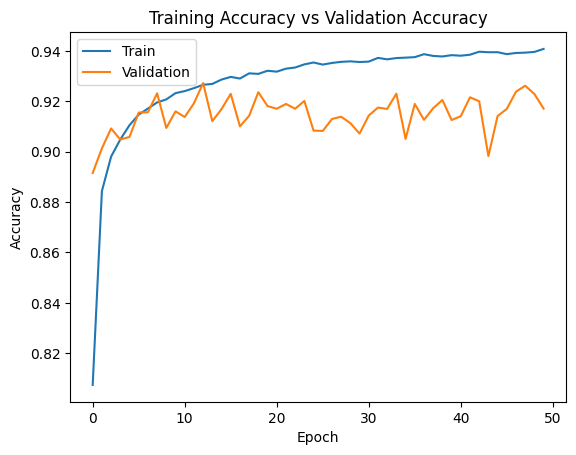

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

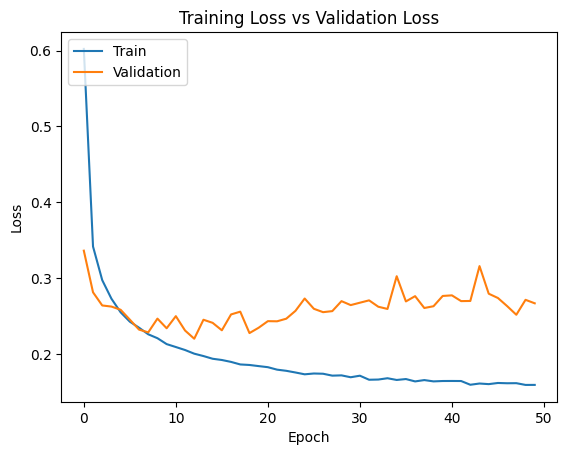

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Recognition and Post-Processing


    1)The sort contours function is used to get the correct order of individual characters for correct output extraction. In this case for extracting a single word, a left to right sorting of individual characters is needed.
    2)The get letters function fetches the list of letters and get word function gets the individual word.


In [ ]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [ ]:
# create a function to predict letters
def get_letters(img):
    # List to store information about detected letters
    letters = []

    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to create a binary image
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

    # Find contours in the binary image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # sort_contours function --> sort contours from left to right
    contours = sort_contours(contours, method="left-to-right")[0]

    # Create an empty DataFrame to store bounding box information and character
    df = pd.DataFrame(columns=['x', 'y', 'w', 'h', 'character'])

    for contour in contours:
        # Skip small contours (noise)
        if cv2.contourArea(contour) < 15:
            continue

        # Get bounding box coordinates (x, y, width, height)
        x, y, w, h = cv2.boundingRect(contour)

        # Extract the region of interest (ROI) from the grayscale image
        roi = gray[y-5:y + h+5, x-5:x +5+ w]

        # Apply thresholding to the ROI
        thresh_roi = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

        # Resize the thresholded ROI to a consistent size
        thresh_roi = cv2.resize(thresh_roi, (32, 32), interpolation=cv2.INTER_CUBIC)

        # Normalize pixel values to the range [0, 1]
        thresh_roi = thresh_roi.astype("float32") / 255.0

        # Add a channel dimension to the thresholded ROI
        thresh_roi = np.expand_dims(thresh_roi, axis=-1)

        # Reshape the thresholded ROI for model prediction
        thresh_roi = thresh_roi.reshape(1, 32, 32, 1)

        # Make a prediction using the model (assumed to be defined as 'modell')
        ypred = model.predict(thresh_roi, verbose=0)

        # Inverse transform the prediction using the label binarizer (LB)
        ypred = LB.inverse_transform(ypred)

        # Extract the predicted character
        [p] = ypred

        # Draw the predicted character on the original image
        cv2.putText(img=image, text=p, org=(x, y), fontFace=cv2.FONT_HERSHEY_DUPLEX, fontScale=1.0,
                    color=(255, 0, 0), thickness=2)

        # Store information about the letter in a dictionary
        new_data = {
            'x': x,
            'y': y,
            'w': w,
            'h': h,
            'character': p
        }

        # Append new data to the DataFrame
        df = pd.concat([df, pd.DataFrame([new_data])], ignore_index=True)

    # Return the DataFrame and the image with drawn characters
    return df, image

0    G
1    M
2    E
3    S
4    R
Name: character, dtype: object

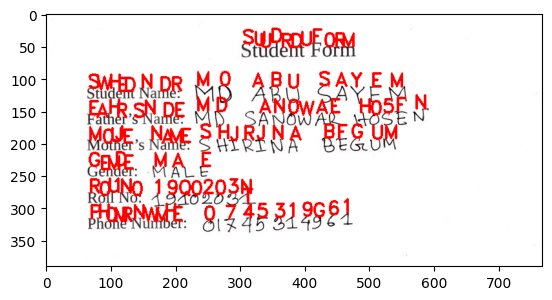

In [ ]:
pred_df,output_image = get_letters("/content/sayem_jan16.JPG")
plt.imshow(output_image)
pred_df['character'].head()

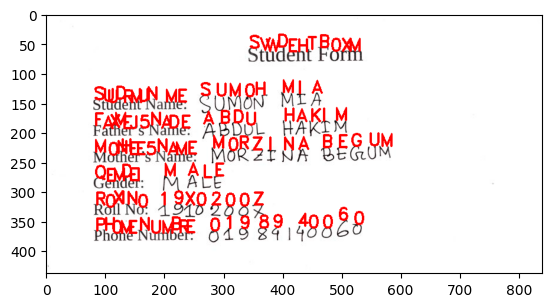

In [ ]:
pred_df,output_image = get_letters("/content/sumon_jan16.JPG")
plt.imshow(output_image)

0    S
1    A
2    Y
3    E
4    M
Name: character, dtype: object

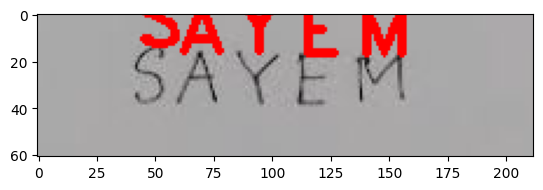

In [ ]:
pred_df,output_image = get_letters("/content/sa.JPG")
plt.imshow(output_image)
pred_df['character']

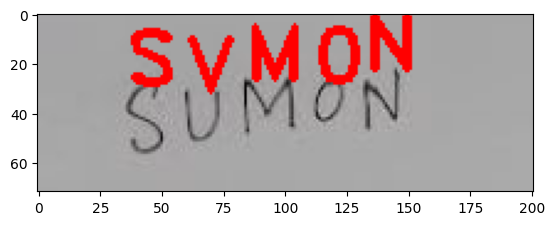

In [ ]:
pred_df,output_image = get_letters("/content/su.JPG")
plt.imshow(output_image)

0    S
1    A
2    Y
3    T
4    J
5    A
Name: character, dtype: object

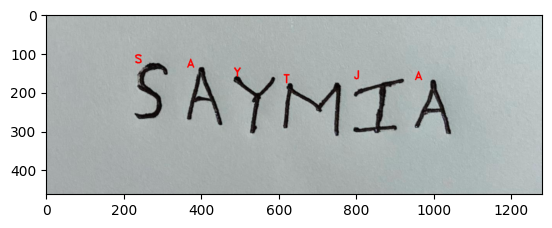

In [ ]:
pred_df,output_image = get_letters("/content/WhatsApp Image 2024-04-17 at 11.54.36 PM.jpeg")
plt.imshow(output_image)
pred_df['character']

1/1 [==============================] - 0s 82ms/step
ZZZ45


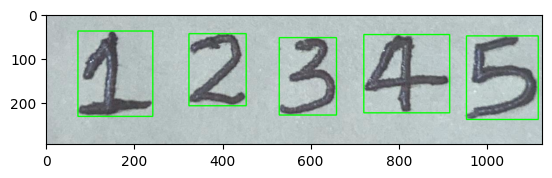

In [ ]:
letter,image = get_letters("/content/WhatsApp Image 2024-04-17 at 8.55.24 PM.jpeg")
word = get_word(letter)
print(word)
plt.imshow(image)

1/1 [==============================] - 0s 57ms/step
P0NNUG


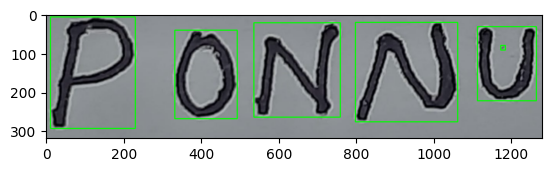

In [ ]:
letter,image = get_letters("/content/WhatsApp Image 2024-04-15 at 11.34.17 AM.jpeg")
word = get_word(letter)
print(word)
plt.imshow(image)

1/1 [==============================] - 0s 38ms/step
M1HAEV9


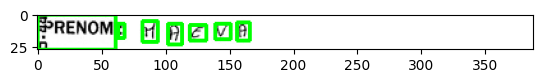

In [ ]:
letter,image = get_letters("/content/TRAIN_00078.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)


# Drawbacks

   1) The recognition part is dependent on the contour detection code, so if the opencv library is not able to find the character contour, then this method will fail.
   2)There could be a lot of variation in a single handwritten letter in terms of writing style, therefore a lot more examples are needed for training this model.
   3)This model will not work for connected texts like a cursive handwritten word.

